Shape of X_train (56000, 28, 28)
Shape of y_train (56000,)
Shape of X_test  (14000, 28, 28)
Shape of y_test  (14000,)


C:\Users\ADITYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6785 - loss: 1.1325 - val_accuracy: 0.8974 - val_loss: 0.3548
Epoch 2/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9036 - loss: 0.3355 - val_accuracy: 0.9147 - val_loss: 0.2922
Epoch 3/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9191 - loss: 0.2762 - val_accuracy: 0.9263 - val_loss: 0.2622
Epoch 4/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9297 - loss: 0.2423 - val_accuracy: 0.9341 - val_loss: 0.2349
Epoch 5/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9381 - loss: 0.2153 - val_accuracy: 0.9392 - val_loss: 0.2111
Epoch 6/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9426 - loss: 0.1995 - val_accuracy: 0.9424 - val_loss: 0.1979
Epoch 7/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9501 - loss: 0.1727 - val_accuracy: 0.9426 - val_loss: 0.1913
Epoch 8/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9522 - loss: 0.1632 - 

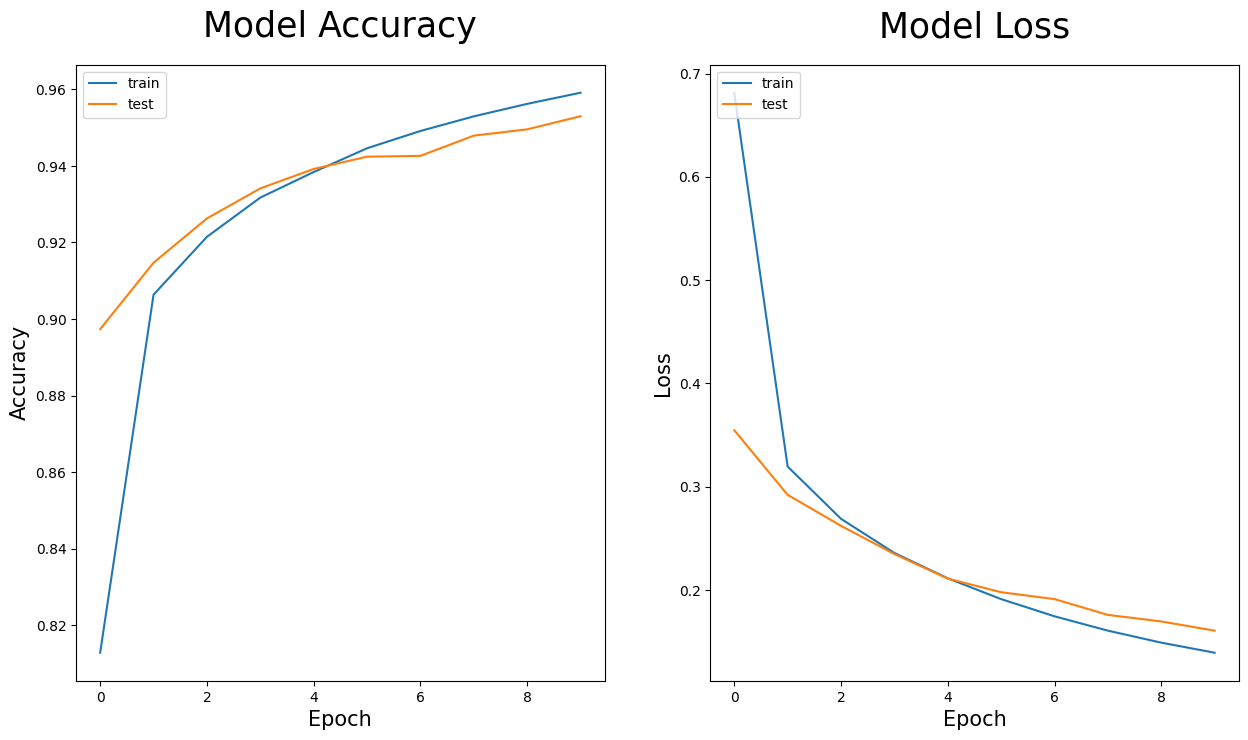

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9522 - loss: 0.1585
Test Loss: 0.16070692241191864
Test Accuracy: 0.953000009059906
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


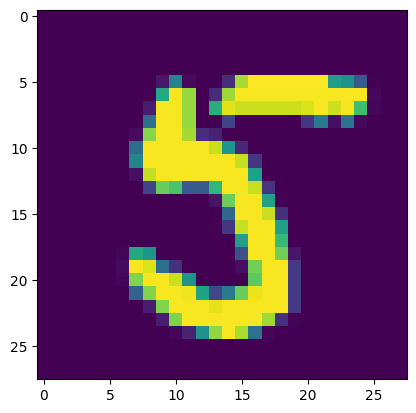

5


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Load your CSV file
# Assuming your CSV file has 784 columns for pixels and one column for the label at the end
df = pd.read_csv(r"E:\Deep Learning Datasets-20241106T032755Z-001\Deep Learning Datasets\3 MNIST\mnist_784_csv.csv")

# Split into features (X) and labels (y)
X = df.iloc[:, :-1].values  # All rows, all columns except the last (pixel data)
y = df.iloc[:, -1].values   # The last column (labels)

# Reshape X to be 28x28 images
X = X.reshape(-1, 28, 28)  # -1 means infer the number of samples, 28x28 is the image shape

# Normalize pixel values to be between 0 and 1
X = X / 255.0

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of X_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu', name='L1'),
    keras.layers.Dense(50, activation='relu', name='L2'),
    keras.layers.Dense(10, activation='softmax', name='L3')
])

model.compile(optimizer="sgd", loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train,
                    batch_size=30,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    shuffle=True)

# Plotting the Model Accuracy & Model Loss vs Epochs
plt.figure(figsize=[15,8])

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate model performance on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
predicted_value = model.predict(x_test)
plt.imshow(x_test[15])
plt.show()

# Display the predicted class
print(np.argmax(predicted_value[15], axis=0))
